In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e6c2a98325f08328d9afb3f58a1fa6fbf432676390fc4e59ab677f1854779629
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Fuzzy NFT

In [3]:
x_tds = np.arange(0, 1400, 0.1)
x_ph=np.arange(0, 14, 0.1)
TDS = ctrl.Antecedent(x_tds, 'TDS')
pH = ctrl.Antecedent(x_ph, 'pH')

In [4]:
TDS['very low'] = fuzz.trapmf(x_tds, [0, 0, 150, 625])
TDS['low'] = fuzz.trapmf(x_tds, [150, 625, 625, 1050])
TDS['normal'] = fuzz.trapmf(x_tds, [625, 1050, 1400, 1400])

pH['strong acid'] = fuzz.trapmf(x_ph, [0, 0, 1, 4])
pH['weak acid'] = fuzz.trimf(x_ph, [1, 4, 5.5])
pH['normal'] = fuzz.trapmf(x_ph, [4, 5.5, 6.5, 8])
pH['weak alkaline'] = fuzz.trimf(x_ph, [6.5, 8, 11])
pH['strong alkaline'] = fuzz.trapmf(x_ph, [8, 11, 14, 14])


In [5]:
x_phup = np.arange(0, 3000,0.1)
x_phdown=np.arange(0, 3000, 0.1)
x_ppk=np.arange(0, 8000, 0.1)

pHup = ctrl.Consequent(x_phup, 'pHup')
pHdown = ctrl.Consequent(x_phdown, 'pHdown')
AB = ctrl.Consequent(x_ppk, 'AB')

In [6]:
pHup['fast']= fuzz.trapmf(x_phup, [0, 0, 300, 1800])
pHup['slow']= fuzz.trapmf(x_phup, [300, 1800, 3000, 3000])
pHdown['fast']= fuzz.trapmf(x_phdown, [0, 0, 300, 1800])
pHdown['slow']= fuzz.trapmf(x_phdown, [300, 1800, 3000, 3000])
AB['fast'] = fuzz.trapmf(x_ppk, [0, 0, 400, 2400])
AB['slow'] = fuzz.trapmf(x_ppk, [400, 2400, 8000, 8000])


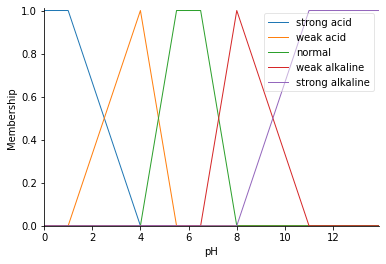

In [7]:
pH.view()

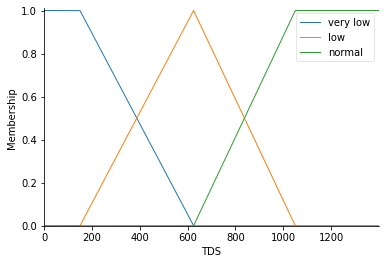

In [8]:
TDS.view()

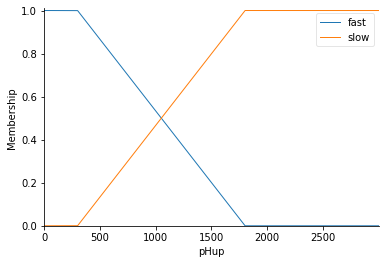

In [9]:
pHup.view()

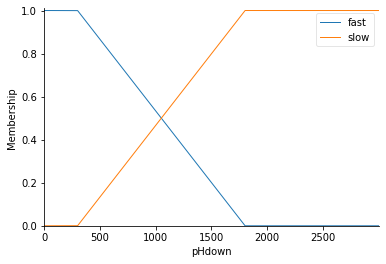

In [10]:
pHdown.view()

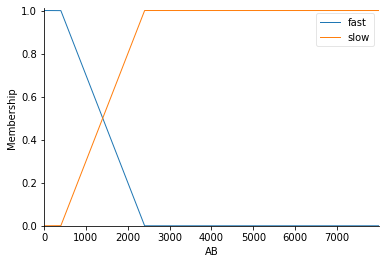

In [11]:
AB.view()

In [12]:
rule1 = ctrl.Rule(pH['strong acid'] & TDS['very low'], (pHup['slow'], AB['slow']))
rule2 = ctrl.Rule(pH['strong acid'] & TDS['low'], (pHup['slow'], AB['fast']))
rule3 = ctrl.Rule(pH['strong acid'] & TDS['normal'], pHup['slow'])

rule4 = ctrl.Rule(pH['weak acid'] & TDS['very low'] , (pHup['fast'], AB['slow']))
rule5 = ctrl.Rule(pH['weak acid'] & TDS['low'], (pHup['fast'], AB['fast']))
rule6 = ctrl.Rule(pH['weak acid']& TDS['normal'], pHup['fast'])

rule7 = ctrl.Rule(pH['normal'] & TDS['very low'] , AB['slow'])
rule8 = ctrl.Rule(pH['normal'] & TDS['low'], AB['fast'])

rule9 = ctrl.Rule(pH['weak alkaline'] & TDS['very low'] , (pHdown['fast'], AB['slow']))
rule10 = ctrl.Rule(pH['weak alkaline'] & TDS['low'], (pHdown['fast'], AB['fast']))
rule11 = ctrl.Rule(pH['weak alkaline'] & TDS['normal'], pHdown['fast'])

rule12 = ctrl.Rule(pH['strong alkaline'] & TDS['very low'], (pHdown['slow'], AB['slow']))
rule13 = ctrl.Rule(pH['strong alkaline'] & TDS['low'], (pHdown['slow'], AB['fast']))
rule14 = ctrl.Rule(pH['strong alkaline'] & TDS['normal'], pHdown['slow'])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ac2932a90>)

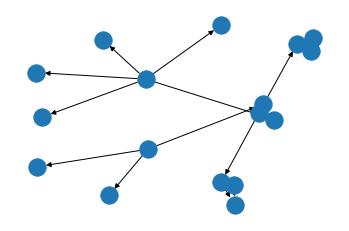

In [13]:
rule1.view()

In [14]:
#pHup_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7, rule8, rule9,rule10, rule11, rule12,rule13, rule14])
pHup_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
pHup_out = ctrl.ControlSystemSimulation(pHup_ctrl)

In [15]:
pHdown_ctrl = ctrl.ControlSystem([rule9,rule10, rule11, rule12,rule13, rule14])
#pHdown_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7, rule8, rule9,rule10, rule11, rule12,rule13, rule14])
pHdown_out = ctrl.ControlSystemSimulation(pHdown_ctrl)

In [16]:
#AB_ctrl = ctrl.ControlSystem([rule1, rule2, rule4, rule5,rule7, rule8, rule9,rule10, rule12,rule13])
#AB_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7, rule8, rule9,rule10, rule11, rule12,rule13, rule14])
AB_ctrl = ctrl.ControlSystem([rule1, rule2, rule4])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)

#Percobaan 1

In [17]:
val_ph= 6.35
val_tds= 110
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

4674.6970921276215


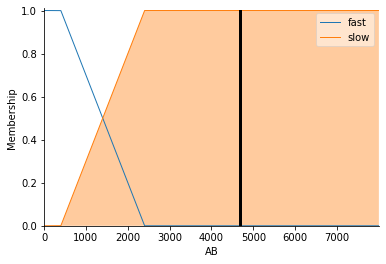

In [18]:
AB_ctrl = ctrl.ControlSystem([rule7, rule8])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 2

In [19]:
val_ph= 6.09
val_tds= 946
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

1082.277592259892


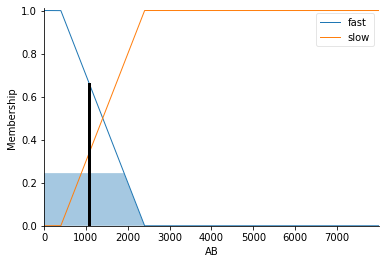

In [20]:
AB_ctrl = ctrl.ControlSystem([rule7, rule8])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 3.1

In [21]:
val_ph= 4.02
val_tds= 272
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

662.9826790610564


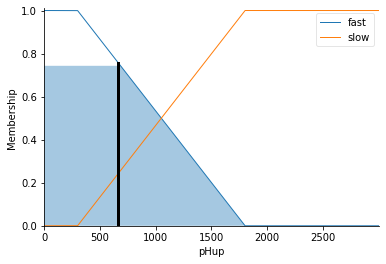

In [22]:
pHup_out.compute()
print (pHup_out.output['pHup'])
pHup.view(sim=pHup_out)

4423.093805133388


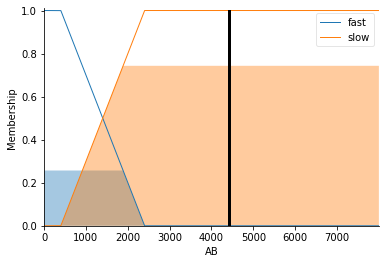

In [23]:
AB_ctrl = ctrl.ControlSystem([rule1, rule2, rule4, rule5, rule7, rule8])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

# Percobaan 3.2

In [24]:
val_ph= 4.96
val_tds= 347
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

772.941176470677


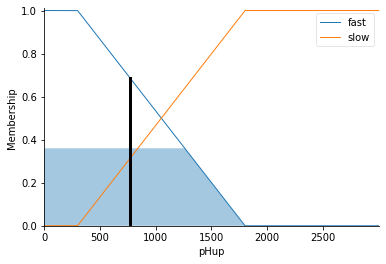

In [25]:
pHup_ctrl = ctrl.ControlSystem([rule4, rule5, rule6])
pHup_out = ctrl.ControlSystemSimulation(pHup_ctrl)
pHup_out.compute()
print (pHup_out.output['pHup'])
pHup.view(sim=pHup_out)

4177.068678905666


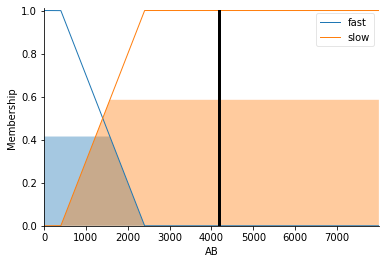

In [26]:
AB_ctrl = ctrl.ControlSystem([rule1, rule2, rule4, rule5, rule7, rule8])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 4

In [27]:
val_ph= 4.54
val_tds= 117
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

689.0909090909043


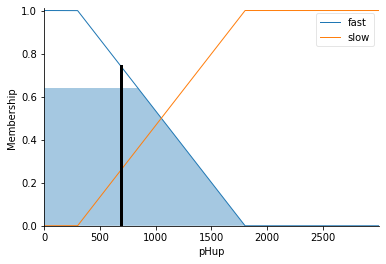

In [28]:
pHup_ctrl = ctrl.ControlSystem([rule4, rule5, rule6])
pHup_out = ctrl.ControlSystemSimulation(pHup_ctrl)
pHup_out.compute()
print (pHup_out.output['pHup'])
pHup.view(sim=pHup_out)

4223.33529100511


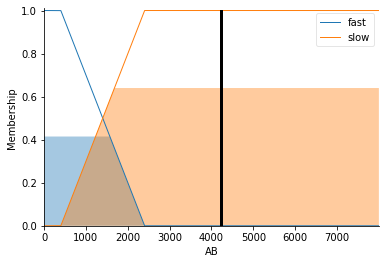

In [29]:
AB_ctrl = ctrl.ControlSystem([rule1, rule2, rule4, rule5, rule7, rule8])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 5.1

In [30]:
val_ph= 10.55
val_tds= 324
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

1800.8921012972892


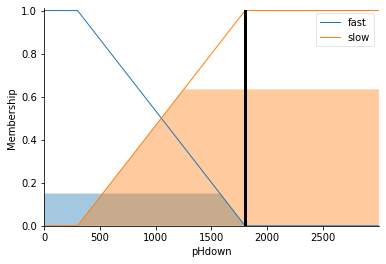

In [31]:
pHdown_ctrl = ctrl.ControlSystem([rule9, rule10, rule11,rule12, rule13, rule14])
pHdown_out = ctrl.ControlSystemSimulation(pHdown_ctrl)
pHdown_out.compute()
print (pHdown_out.output['pHdown'])
pHdown.view(sim=pHdown_out)

4218.177631556009


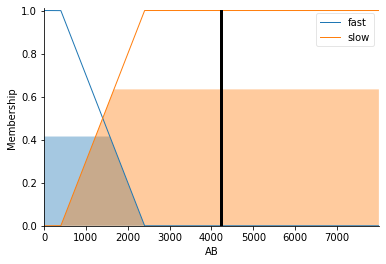

In [32]:
AB_ctrl = ctrl.ControlSystem([rule9, rule10,rule12, rule13])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 5.2

In [33]:
val_ph= 8.67
val_tds= 644
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

1445.6840259489202


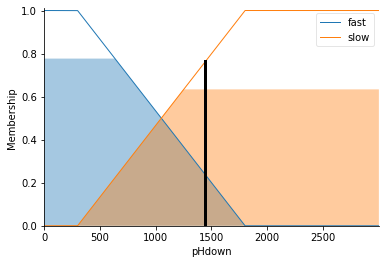

In [34]:
pHdown_ctrl = ctrl.ControlSystem([rule9, rule10, rule11,rule12, rule13, rule14])
pHdown_out = ctrl.ControlSystemSimulation(pHdown_ctrl)
pHdown_out.compute()
print (pHdown_out.output['pHdown'])
pHdown.view(sim=pHdown_out)

873.5979922427772


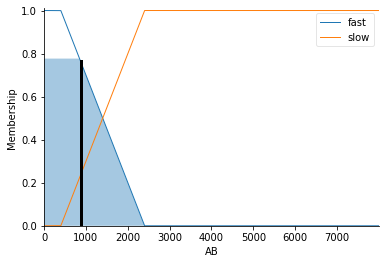

In [35]:
AB_ctrl = ctrl.ControlSystem([rule9, rule10,rule12, rule13])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 5.3

In [36]:
val_ph= 6.83
val_tds= 1856
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

1760.4850301751496


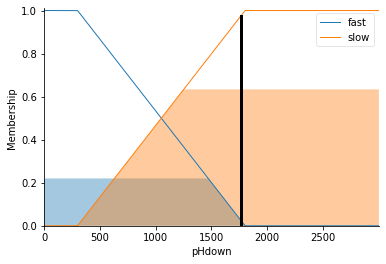

In [37]:
pHdown_ctrl = ctrl.ControlSystem([rule9, rule10, rule11,rule12, rule13, rule14])
pHdown_out = ctrl.ControlSystemSimulation(pHdown_ctrl)
pHdown_out.compute()
print (pHdown_out.output['pHdown'])
pHdown.view(sim=pHdown_out)

873.5979922427772


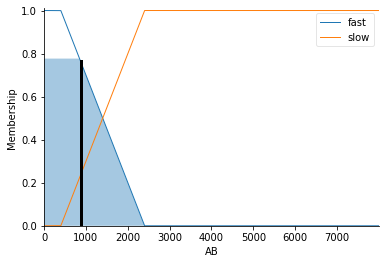

In [38]:
AB_ctrl = ctrl.ControlSystem([rule9, rule10,rule12, rule13])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 6.1

In [39]:
val_ph= 9.46
val_tds= 531
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

1572.8589620162093


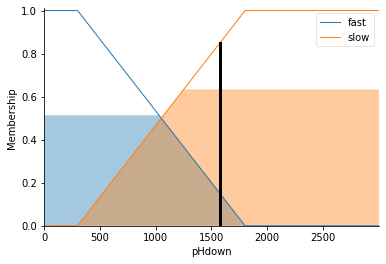

In [40]:
pHdown_ctrl = ctrl.ControlSystem([rule9, rule10, rule11,rule12, rule13, rule14])
pHdown_out = ctrl.ControlSystemSimulation(pHdown_ctrl)
pHdown_out.compute()
print (pHdown_out.output['pHdown'])
pHdown.view(sim=pHdown_out)

2887.1977259804507


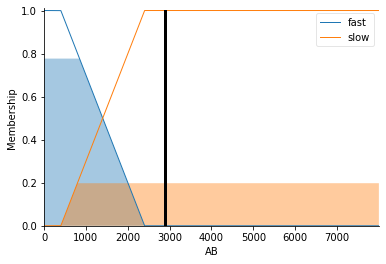

In [41]:
AB_ctrl = ctrl.ControlSystem([rule9, rule10,rule12, rule13])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Percobaan 6.2

In [42]:
val_ph= 7.69
val_tds= 864
pHup_out.input['pH'] = val_ph
pHup_out.input['TDS'] = val_tds
pHdown_out.input['pH'] = val_ph
pHdown_out.input['TDS'] = val_tds
AB_out.input['pH']=val_ph
AB_out.input['TDS']=val_tds

1543.911115653512


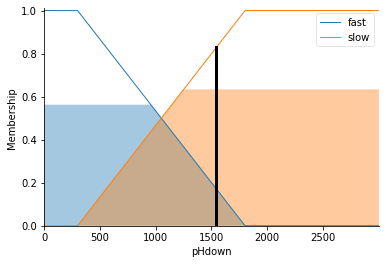

In [43]:
pHdown_ctrl = ctrl.ControlSystem([rule9, rule10, rule11,rule12, rule13, rule14])
pHdown_out = ctrl.ControlSystemSimulation(pHdown_ctrl)
pHdown_out.compute()
print (pHdown_out.output['pHdown'])
pHdown.view(sim=pHdown_out)

873.5979922427772


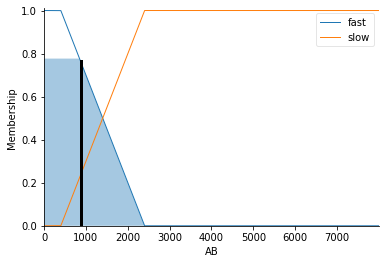

In [44]:
AB_ctrl = ctrl.ControlSystem([rule9, rule10,rule12, rule13])
AB_out = ctrl.ControlSystemSimulation(AB_ctrl)
AB_out.compute()
print (AB_out.output['AB'])
AB.view(sim=AB_out)

#Surface Control

##pHUp

In [45]:
system = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6])

In [48]:
sim = ctrl.ControlSystemSimulation(system, flush_after_run=10 * 10 + 1)

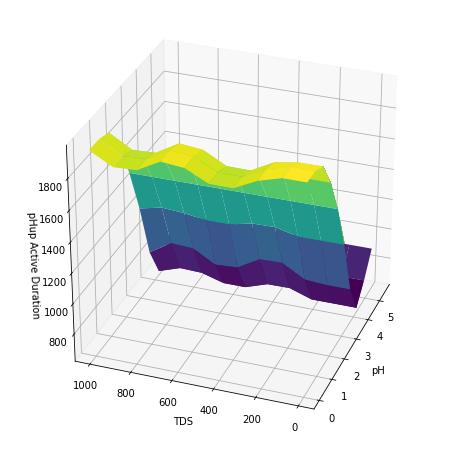

In [49]:
# We can simulate at higher resolution with full accuracy
x_upsampled = np.linspace(0, 5.49, 10)
y_upsampled = np.linspace(0, 1000, 10)
x1, y1 = np.meshgrid(x_upsampled, y_upsampled)
z1 = np.zeros_like(x1)

# Loop through the system 21*21 times to collect the control surface
for i in range(10):
    for j in range(10):
        sim.input['pH'] = x1[i, j]
        sim.input['TDS'] = y1[i, j]
        sim.compute()
        z1[i, j] = sim.output['pHup']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x1, y1, z1, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

#cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x1, y1, z1, zdir='y', offset=3, cmap='viridis', alpha=0.5)
ax.set(xlabel='pH', ylabel='TDS', zlabel='pHup Active Duration')
ax.view_init(30, 200)

##pHdown

In [51]:
system = ctrl.ControlSystem(rules=[rule9, rule10, rule11,rule12, rule13, rule14])

In [52]:
sim = ctrl.ControlSystemSimulation(system, flush_after_run=10 * 10 + 1)

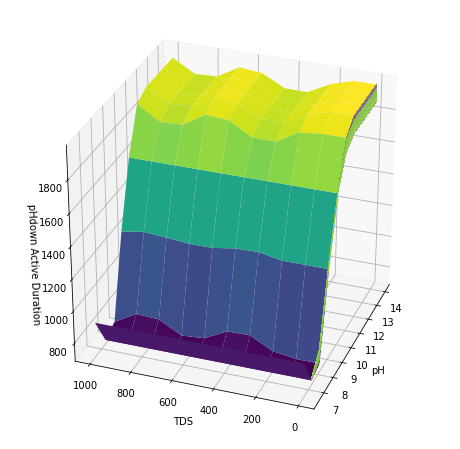

In [53]:
# We can simulate at higher resolution with full accuracy
x_upsampled = np.linspace(6.51, 14, 10)
y_upsampled = np.linspace(0, 1000, 10)
x2, y2 = np.meshgrid(x_upsampled, y_upsampled)
z2 = np.zeros_like(x2)

# Loop through the system 21*21 times to collect the control surface
for i in range(10):
    for j in range(10):
        sim.input['pH'] = x2[i, j]
        sim.input['TDS'] = y2[i, j]
        sim.compute()
        z2[i, j] = sim.output['pHdown']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

#cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x2, y2, z2, zdir='y', offset=3, cmap='viridis', alpha=0.5)
ax.set(xlabel='pH', ylabel='TDS', zlabel='pHdown Active Duration')
ax.view_init(30, 200)

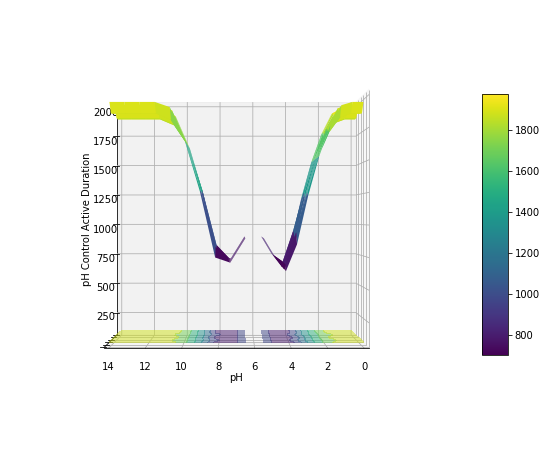

In [54]:
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(x1, y1, z1, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)
surf2 = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)
cset = ax.contourf(x1, y1, z1, zdir='z', offset=100, cmap='viridis', alpha=0.5)
cset = ax.contourf(x2, y2, z2, zdir='z', offset=100, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)
#ax.set(xlabel='pH', ylabel='TDS', zlabel='pH Control Active Duration')
ax.set(xlabel='pH', zlabel='pH Control Active Duration')
ax.set_zlim(100, 2000)
ax.set_ylim(0, 1000)
ax.set_xlim(0, 14)
ax.set_yticklabels([])
ax.set_zlabel('pH Control Active Duration', rotation=0, labelpad=10)
fig.colorbar(surf1, ax = ax, shrink = 0.6, aspect =10)
ax.view_init(0, 90)

##AB Low pH

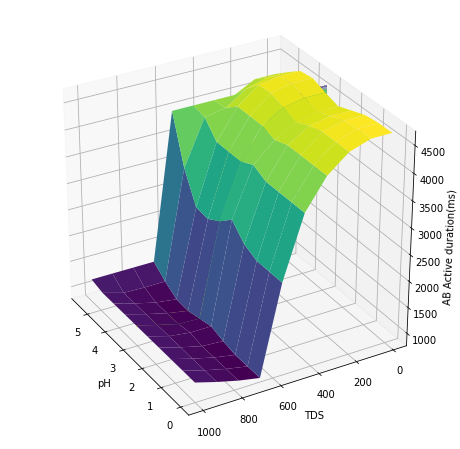

In [55]:
system = ctrl.ControlSystem(rules=[rule1, rule2, rule4, rule5])
sim = ctrl.ControlSystemSimulation(system, flush_after_run=10 * 10 + 1)
# We can simulate at higher resolution with full accuracy
x_upsampled = np.linspace(0, 5.4999, 10)
y_upsampled = np.linspace(0, 1000, 10)
x0, y0 = np.meshgrid(x_upsampled, y_upsampled)
z0 = np.zeros_like(x0)

# Loop through the system 21*21 times to collect the control surface
for i in range(10):
    for j in range(10):
        sim.input['pH'] = x0[i, j]
        sim.input['TDS'] = y0[i, j]
        sim.compute()
        z0[i, j] = sim.output['AB']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf0 = ax.plot_surface(x0, y0, z0, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

#cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x0, y0, z0, zdir='x', offset=3, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)
ax.set(xlabel='pH', ylabel='TDS', zlabel='AB Active duration(ms)')
ax.view_init(30, 150)

##AB High pH

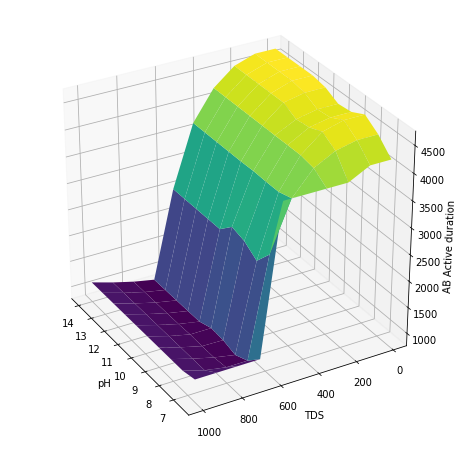

In [58]:
system = ctrl.ControlSystem(rules=[rule9, rule10, rule11,rule12, rule13, rule14])
sim = ctrl.ControlSystemSimulation(system, flush_after_run=10 * 10 + 1)
# We can simulate at higher resolution with full accuracy
x_upsampled = np.linspace(6.5001, 14, 10)
y_upsampled = np.linspace(0, 1000, 10)
x2, y2 = np.meshgrid(x_upsampled, y_upsampled)
z2 = np.zeros_like(x2)

# Loop through the system 21*21 times to collect the control surface
for i in range(10):
    for j in range(10):
        sim.input['pH'] = x2[i, j]
        sim.input['TDS'] = y2[i, j]
        sim.compute()
        z2[i, j] = sim.output['AB']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf2 = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

#cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x2, y2, z2, zdir='x', offset=-50, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)
ax.set(xlabel='pH', ylabel='TDS', zlabel='AB Active duration')
ax.view_init(30, 150)

##AB Normal pH

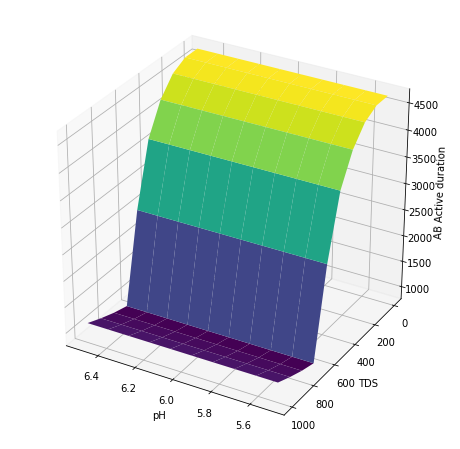

In [59]:
system = ctrl.ControlSystem(rules=[rule7, rule8])
sim = ctrl.ControlSystemSimulation(system, flush_after_run=10 * 10 + 1)
# We can simulate at higher resolution with full accuracy
x_upsampled = np.linspace(5.5, 6.5, 10)
y_upsampled = np.linspace(0, 1000, 10)
x1, y1 = np.meshgrid(x_upsampled, y_upsampled)
z1 = np.zeros_like(x1)

# Loop through the system 21*21 times to collect the control surface
for i in range(10):
    for j in range(10):
        sim.input['pH'] = x1[i, j]
        sim.input['TDS'] = y1[i, j]
        sim.compute()
        z1[i, j] = sim.output['AB']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(x1, y1, z1, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

#cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x1, y1, z1, zdir='x', offset=3, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=30, cmap='viridis', alpha=0.5)
ax.set(xlabel='pH', ylabel='TDS', zlabel='AB Active duration')
ax.view_init(30, 120)

In [60]:
x3= np.concatenate([x0, x1, x2], axis=1)
y3= np.concatenate([y0, y1, y2], axis=1)
z3= np.concatenate([z0, z1, z2], axis=1)

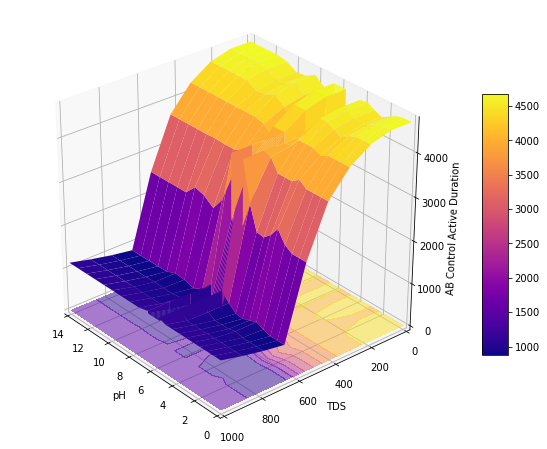

In [61]:
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf3 = ax.plot_surface(x3, y3, z3, rstride=1, cstride=1, cmap='plasma',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x3, y3, z3, zdir='z', offset=0, cmap='plasma', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)
ax.set(xlabel='pH', ylabel='TDS', zlabel='AB Control Active Duration')
ax.set_zlim(0, 4700)
ax.set_ylim(0, 1000)
ax.set_xlim(0, 14)
fig.colorbar(surf3, ax = ax, shrink = 0.6, aspect =10)
ax.view_init(30, 140)

#res

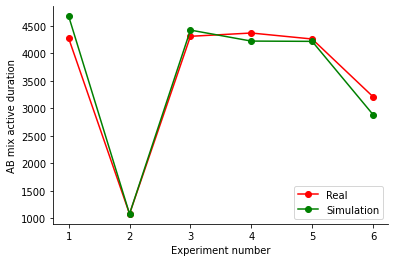

In [62]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([1,2,3,4,5,6])
abmix_real=np.array([4274,1083,4310, 4370, 4261, 3212])

abmix_sim=np.array([4674.70,1082.28,4423.09,4223.33,4218.18, 2887.20])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(x,abmix_real, color = 'r', marker='o')
plt.plot(x,abmix_sim, color = 'g', marker='o')
plt.xlabel("Experiment number")
plt.ylabel("AB mix active duration")
ax.legend(['Real', 'Simulation'])
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.show()

In [63]:
res=abs(abmix_real-abmix_sim)

In [64]:
np.mean(res)

171.46666666666667

In [65]:
np.max(res)

400.6999999999998

In [66]:
diff_o=np.subtract(abmix_real,abmix_sim)
diff= diff_o/np.linalg.norm(diff_o)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 0.40824829046386296


#res ph

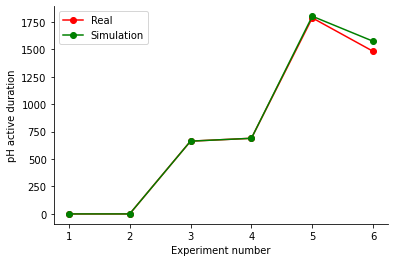

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([1,2,3,4,5,6])
ph_real=np.array([0, 0, 663, 689, 1786, 1481])
ph_sim=np.array([0,0, 662.98, 689.09, 1800.89, 1572.86])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(x,ph_real, color = 'r', marker='o')
plt.plot(x,ph_sim, color = 'g', marker='o')
plt.xlabel("Experiment number")
plt.ylabel("pH active duration")
ax.legend(['Real', 'Simulation'])
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.show()

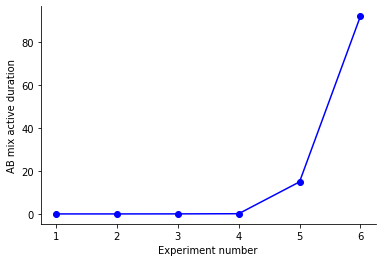

In [68]:
res=abs(ph_real-ph_sim)
x=np.array([1,2,3,4,5,6])
ph_real=np.array([0, 0, 663, 689, 1786, 1481])
ph_sim=np.array([0,0, 662.98, 689.09, 1800.89, 1572.86])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(x,res, color = 'b', marker='o')
plt.xlabel("Experiment number")
plt.ylabel("AB mix active duration")

#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.show()

In [69]:
np.max(res)

91.8599999999999

In [70]:
diff=np.subtract(ph_real,ph_sim)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 37.99118362638009


In [71]:
diff_o=np.subtract(ph_real,ph_sim)
diff= diff_o/np.linalg.norm(diff_o)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 0.408248290463863


In [71]:
0.40824829046386296